##**CHALLENGE TELECOM X LATAM PARTE 2**

###Extracción del archivo tratado. Subiendo archivo optimizado resultante de la parte 1 del Challenge

In [ ]:
# Importando librerías requeridas para el proyecto

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargamos el archivo csv df_normalizado2.csv

df = pd.read_csv('/content/df_normalizado2.csv')

df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
5889,8050-DVOJX,No,Male,1,No,No,49,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),81.35,4060.90,2.711667
5514,7560-QJAVJ,No,Female,0,No,No,70,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),79.60,5589.45,2.653333
4192,5759-RCVCB,Yes,Female,0,No,No,3,No,No phone service,DSL,...,No,No,Yes,No,Month-to-month,No,Credit card (automatic),35.20,108.95,1.173333
3071,4283-FUTGF,Yes,Male,1,No,No,19,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.85,1471.75,2.661667
4015,5494-HECPR,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,80.25,2.675000


##Tratamiento de los datos.

###Eliminando columnas que no son relevantes

In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
df_listo = df.copy()

In [ ]:
df_listo.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [ ]:
cols_to_fix = ['internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies']

In [ ]:
for col in cols_to_fix:
  df_listo[col] = df_listo[col].replace('No internet service', 'No')

###Selección de todas las columnas que tienen el contenido de tipo 'objeto'

In [ ]:
columnas_categoricas = df.select_dtypes(include='object').columns
print(columnas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


###Encoding

In [ ]:
# Conversión de variables categóricas en variables numéricas (One-Hot Encoding)
df_codificado = pd.get_dummies(df_listo, columns=columnas_categoricas, drop_first=True)
df.sample(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
2978,No,Female,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,100.85,399.25,3.361667
4021,No,Male,0,No,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,79.45,0.986667
4533,No,Female,0,No,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.70,4729.75,3.190000
6716,Yes,Female,0,No,No,52,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),111.25,5916.45,3.708333
5426,No,Male,0,Yes,No,33,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,93.35,3092.00,3.111667


In [ ]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7267 non-null   int64  
 1   customer.tenure                                7267 non-null   int64  
 2   account.Charges.Monthly                        7267 non-null   float64
 3   account.Charges.Total                          7256 non-null   float64
 4   Cuentas_Diarias                                7267 non-null   float64
 5   Churn_Yes                                      7267 non-null   bool   
 6   customer.gender_Male                           7267 non-null   bool   
 7   customer.Partner_Yes                           7267 non-null   bool   
 8   customer.Dependents_Yes                        7267 non-null   bool   
 9   phone.PhoneService_Yes                         7267 

In [ ]:
#Verificar si hay valores nulos
df_codificado.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,11
Cuentas_Diarias,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [ ]:
print(df_codificado[['account.Charges.Total']].isnull().sum())

account.Charges.Total    11
dtype: int64


In [ ]:
#Retiramos los valores nulos
df_codificado = df_codificado.dropna(subset=['account.Charges.Total'])

In [ ]:
df_codificado.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,0
Cuentas_Diarias,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


###Correlación de los datos

In [ ]:
corr = df_codificado.corr()

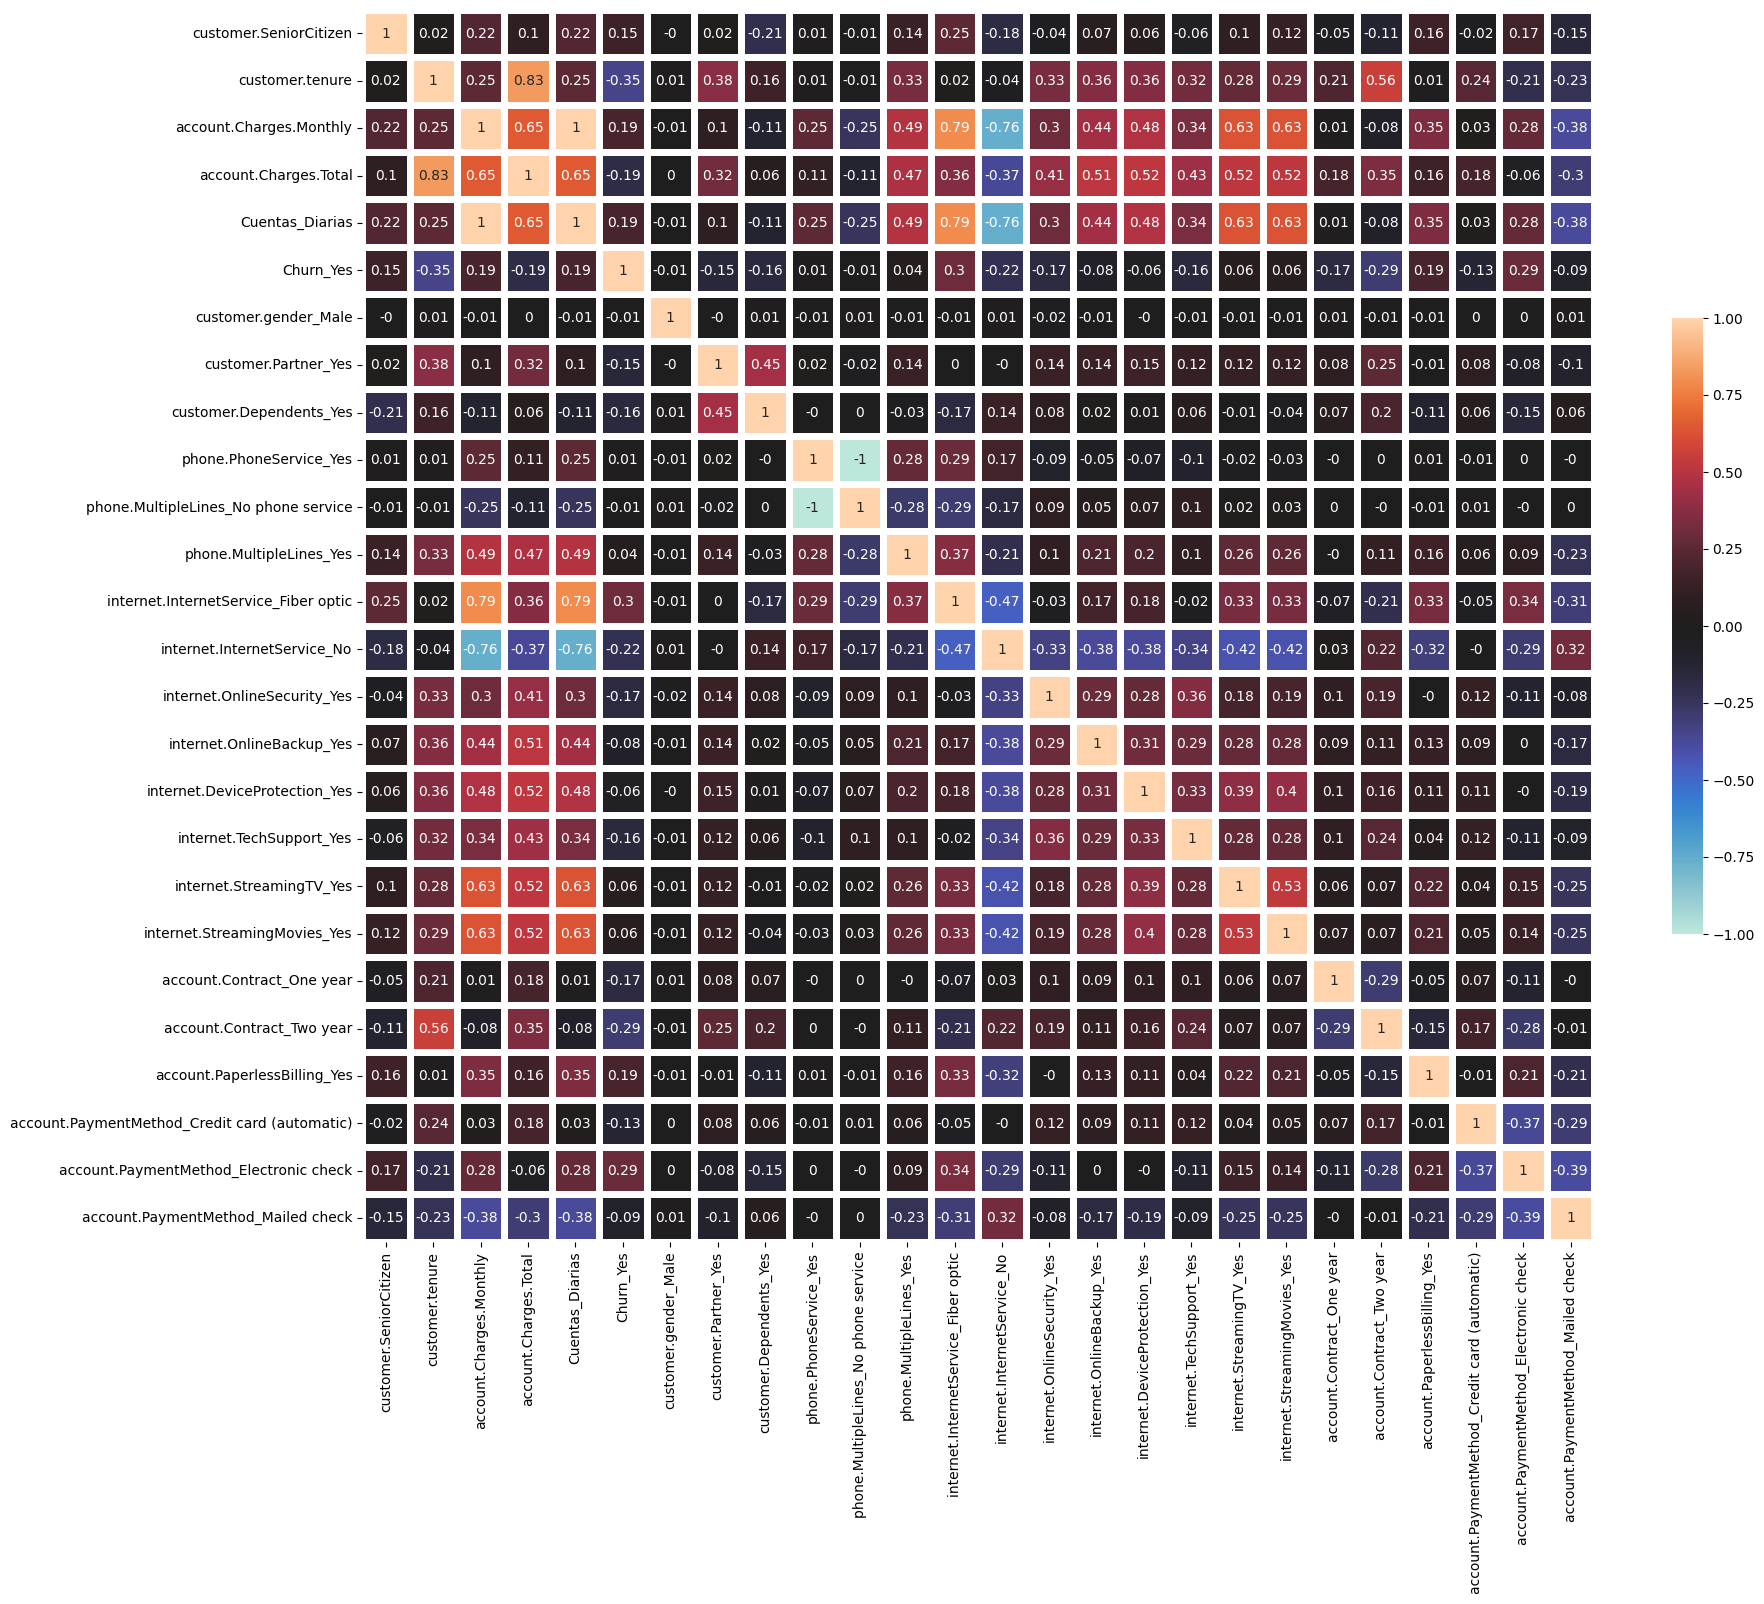

In [ ]:
#Graficamos

import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0, square=True, linewidths=5, annot=True, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
#Filtrando por correlación mínima respecto a "Churn_Yes"

df_codificado_2 = df_codificado.copy()

#Convertir a "0" y "1"
df_codificado_2['Churn_Yes'] = df_codificado_2['Churn_Yes'].astype(int)

#print(df_codificado_2['Churn_Yes'].unique())



In [ ]:
# Calcular correlaciones
corr = df_codificado_2.corr()

# Filtrar las columnas con correlación mínima con "Churn_Yes"
cols = corr.index[abs(corr['Churn_Yes']) >= 0.2]
df_filtrado = df_codificado_2[cols]

In [ ]:
df_filtrado.columns

Index(['customer.tenure', 'Churn_Yes', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'account.Contract_Two year',
       'account.PaymentMethod_Electronic check'],
      dtype='object')

In [ ]:
corr = df_filtrado.corr()

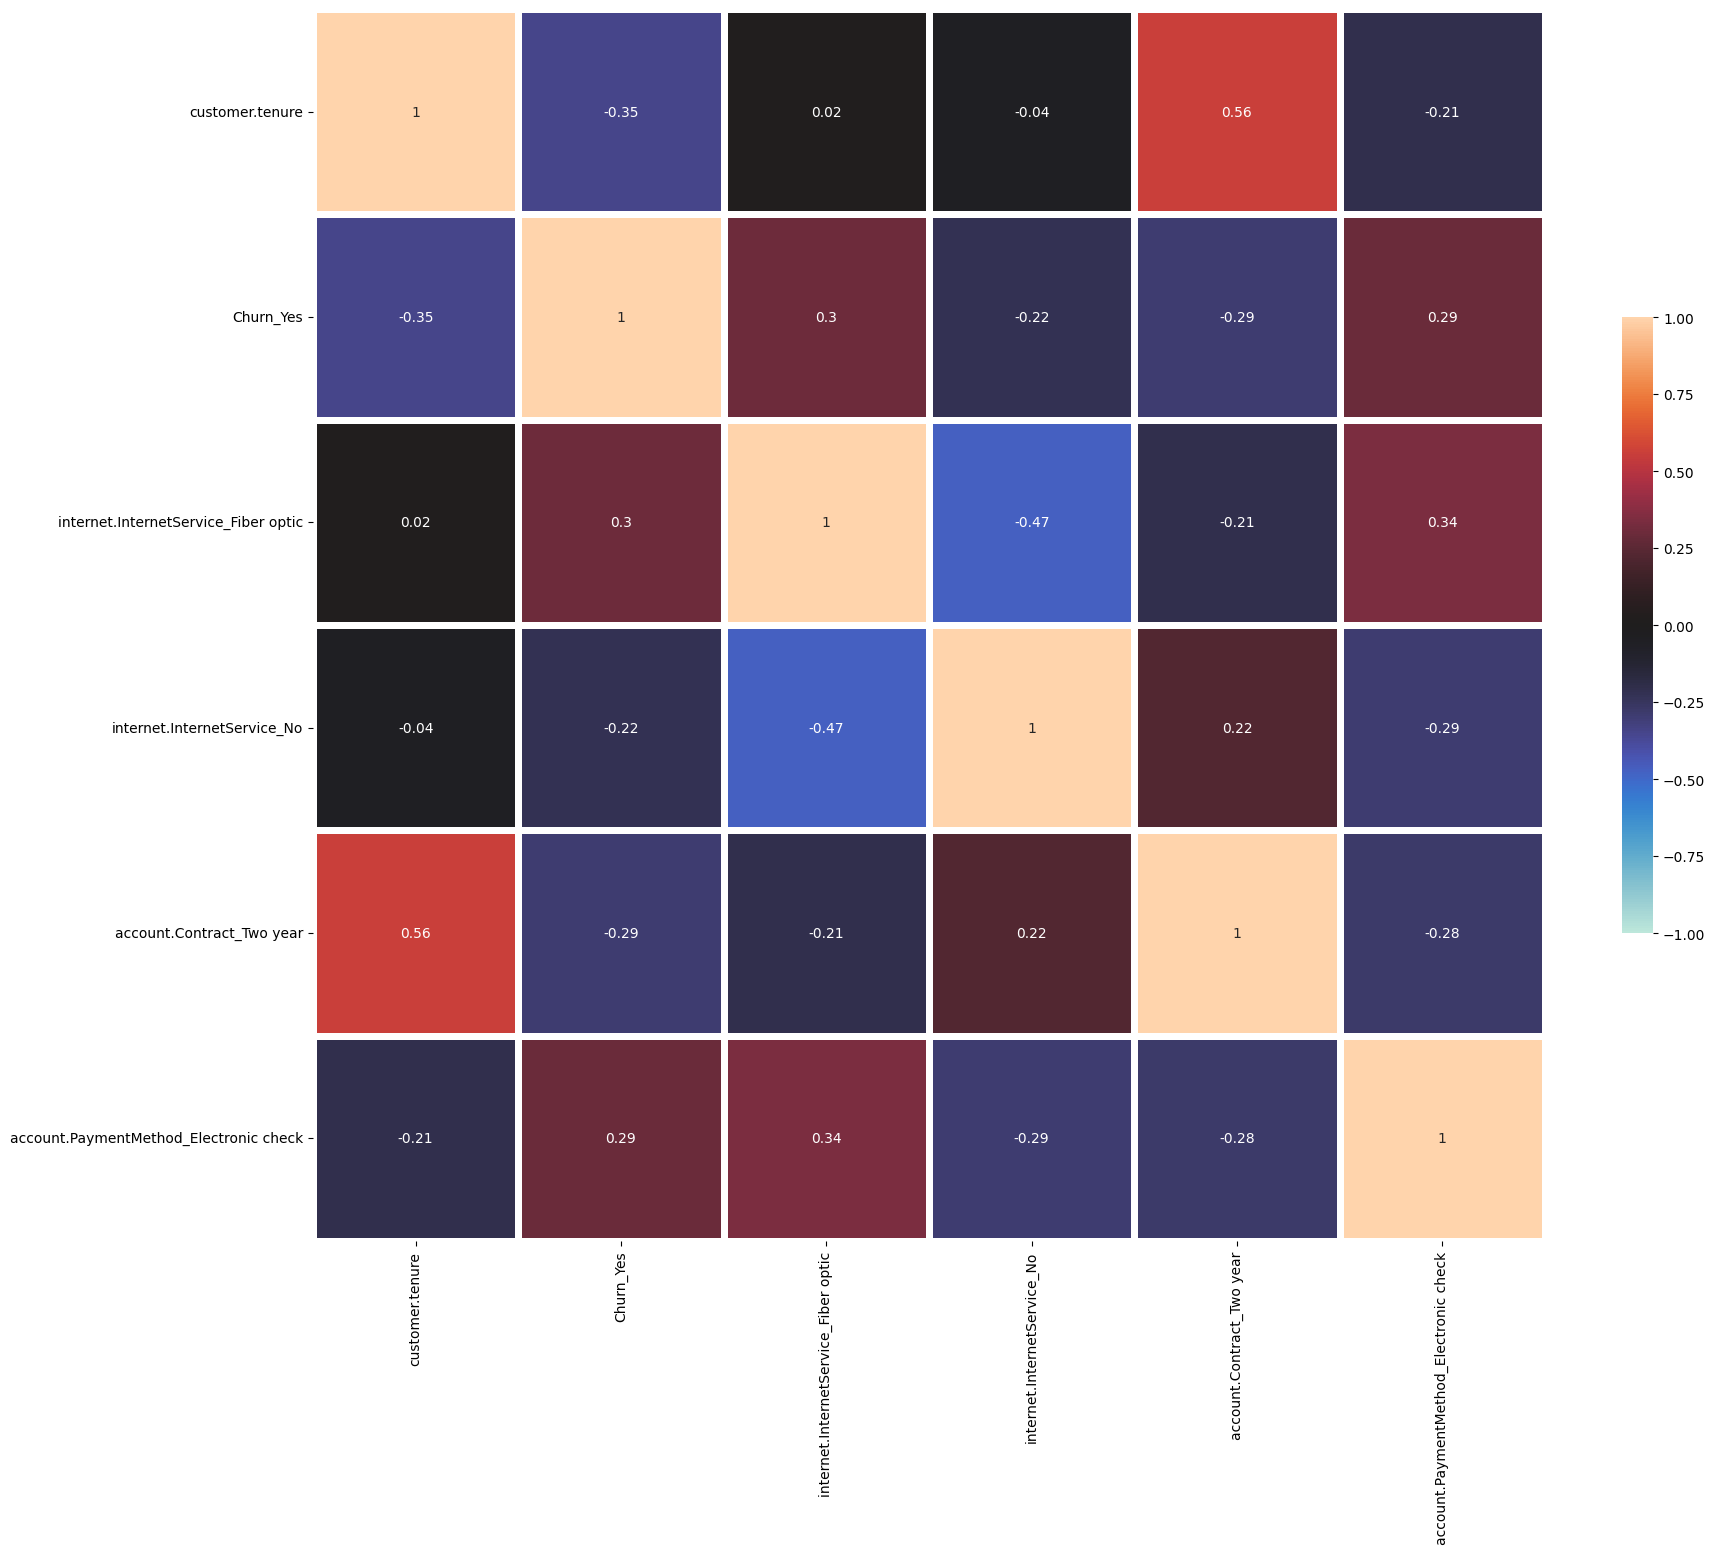

In [ ]:
#Graficamos

import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0, square=True, linewidths=5, annot=True, cbar_kws={"shrink": .5})
plt.show()

###Haciendo análisis de multicolinearidad

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:

from sklearn.preprocessing import StandardScaler

df_dif = df_codificado.copy()

#Identificando columnas numéricas para escalar
col_num = ['customer.tenure', 'Cuentas_Diarias', 'account.Charges.Monthly', 'account.Charges.Total']

#Inicializando el scaler
scaler = StandardScaler()

#Aplicando el scaler a las columnas numéricas
df_dif[col_num] = scaler.fit_transform(df_dif[col_num])

#Mostrando las primeras filas del data frame escalado
display(df_dif.head())


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,-0.952728,0.028037,-0.743818,0.028037,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,-0.952728,-0.161183,-0.766256,-0.161183,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,-1.156341,0.303568,-0.881554,0.303568,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,-0.789837,1.103603,-0.459685,1.103603,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,-1.197063,0.635533,-0.887483,0.635533,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [ ]:
X = df_dif.drop(columns=['Churn_Yes'])

In [ ]:
X_const = add_constant(X)

In [ ]:
X_const = X_const.astype(float)

#Calcular VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

#Mostrando resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
5,Cuentas_Diarias,inf
3,account.Charges.Monthly,inf
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
12,internet.InternetService_Fiber optic,149.253496
13,internet.InternetService_No,105.055970
19,internet.StreamingMovies_Yes,24.249121
18,internet.StreamingTV_Yes,24.146092
4,account.Charges.Total,10.832700
2,customer.tenure,7.580478


In [67]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#Parte 1: Copiar X para no modificar el original
X_filtrada = X_const.copy()

#Parte 2: Remover variables con multicolinearidad VIF = inf
cols_to_drop = ['phone.PhoneService_Yes', 'phone.MultipleLines_No phone service']
X_filtrada.drop(columns=cols_to_drop, inplace=True)

#Parte 3: Remover redundancia fuertes entre variables numéricas
X_filtrada.drop(columns=['Cuentas_Diarias'], inplace=True)

#Parte 4: Remover redundancia entre dummies de la misma variable categórica
X_filtrada.drop(columns=['internet.InternetService_No'], inplace=True)

#Parte 5: Garantizar que los datos están en float para VIF
X_filtrada = X_filtrada.astype(float)

#Parte 6: Recalcular VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_filtrada.columns
vif_data['VIF'] = [variance_inflation_factor(X_filtrada.values, i) for i in range(X_filtrada.shape[1])]

#Parte 7: Mostrar resultados
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,39.653434
3,account.Charges.Monthly,18.205892
4,account.Charges.Total,10.726482
2,customer.tenure,7.547207
9,internet.InternetService_Fiber optic,7.015878
17,account.Contract_Two year,2.532487
14,internet.StreamingTV_Yes,2.184554
15,internet.StreamingMovies_Yes,2.181385
20,account.PaymentMethod_Electronic check,1.971148
21,account.PaymentMethod_Mailed check,1.849397


In [68]:
X_filtrada.drop(columns=['account.Charges.Total'], inplace=True)

**VIF 2**

In [69]:
#Parte 6: Recalcular VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_filtrada.columns
vif_data['VIF'] = [variance_inflation_factor(X_filtrada.values, i) for i in range(X_filtrada.shape[1])]

#Parte 7: Mostrar resultados
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,38.596673
3,account.Charges.Monthly,17.314276
8,internet.InternetService_Fiber optic,6.954312
2,customer.tenure,2.834080
16,account.Contract_Two year,2.521098
13,internet.StreamingTV_Yes,2.161979
14,internet.StreamingMovies_Yes,2.157500
19,account.PaymentMethod_Electronic check,1.968115
20,account.PaymentMethod_Mailed check,1.826027
12,internet.TechSupport_Yes,1.708863


##Modelos Predictivos

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [71]:
X = df_codificado.drop(columns=['Churn_Yes'])
y = df_codificado['Churn_Yes']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

###Normalización

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_val_rus, y_train_val_rus = rus.fit_resample(X_train, y_train)

print('Shape of X_train before undersampling:', X_train.shape)
print('Shape of y_train before undersampling:', y_train.shape)
print('Shape of X_train after undersampling:', X_train_val_rus.shape)
print('Shape of y_train after undersampling:', y_train_val_rus.shape)

Shape of X_train before undersampling: (5079, 25)
Shape of y_train before undersampling: (5079,)
Shape of X_train after undersampling: (2616, 25)
Shape of y_train after undersampling: (2616,)


In [74]:
#smote = SMOTE(random_state=42)
#X_train_val, y_train_val = smote.fit_resample(X_train_scaled, y_train)

In [80]:
#smote = SMOTE(random_state=42)
#X_train_val, y_train_val = smote.fit_resample(X_train_val_rus, y_train_val_rus)

In [89]:
#Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_val, y_train_val)

#Predicción
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

#Evaluación
print('Regresión Logística')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('ROC AUC:', roc_auc_score(y_test, y_prob_lr))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Accuracy: 0.7496554892053284
ROC AUC: 0.8431466308395545
Matriz de confusión:
 [[1188  428]
 [ 117  444]]
              precision    recall  f1-score   support

       False       0.91      0.74      0.81      1616
        True       0.51      0.79      0.62       561

    accuracy                           0.75      2177
   macro avg       0.71      0.76      0.72      2177
weighted avg       0.81      0.75      0.76      2177



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
#Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_val, y_train_val)

#Predicción
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

#Evaluación
print('Random Forest')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC:', roc_auc_score(y_test, y_prob_rf))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.7482774460266421
ROC AUC: 0.8263079984469036
Matriz de confusión:
 [[1201  415]
 [ 133  428]]
              precision    recall  f1-score   support

       False       0.90      0.74      0.81      1616
        True       0.51      0.76      0.61       561

    accuracy                           0.75      2177
   macro avg       0.70      0.75      0.71      2177
weighted avg       0.80      0.75      0.76      2177



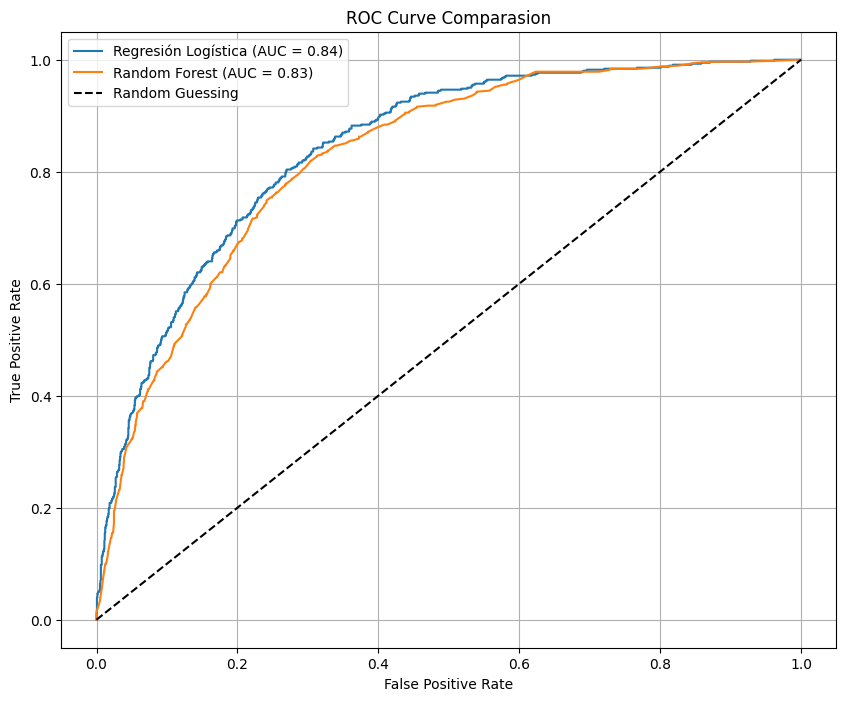

In [91]:
from sklearn.metrics import roc_curve

#Calculando curva ROC para Regresión Logística
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

#Calculando curva ROC para Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

#Plot curvas ROC
plt.figure(figsize=(10,8))
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing') #Diagonal random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparasion')
plt.legend()
plt.grid(True)
plt.show()


##Informe

**Informe — Factores que afectan la cancelación (Churn)**

**1) Resumen ejecutivo**

- La tasa global de churn en el archivo es **≈ 25.7%** (1 869 clientes que cancelaron vs 5 398 que no).
- Las variables con mayor correlación son:
  - **Tenure (tiempo como cliente)**: clientes con poco tiempo tienen mayor churn.
  - **Tipo de contrato**: *Month-to-month* muestra tasas de churn mucho mayores frente a contratos de 1 o 2 años.
  - **Methodo de pago / PaperlessBilling**: *Electronic check* y paperless suelen asociarse a más cancelaciones.
  - **Cargos mensuales (MonthlyCharges) y TotalCharges**: altos cargos mensuales incrementan probabilidad de churn; TotalCharges puede representar relación valor/tenure.
  - **Tipo de servicio de internet & soporte**: *Fiber optic* + ausencia de *OnlineSecurity* o *TechSupport* incrementa churn.
  - **Servicios extra de entretenimiento** (StreamingTV / Movies) y líneas múltiples pueden tener efecto.
-----
**2) Factores con mayor influencia**

**Alto impacto (consistente y robusto)**

1. **Tenure (customer.tenure)**
   1. **Dirección**: menor tenure → mayor probabilidad de churn.
   1. **Motivo**: clientes nuevos prueban el servicio y cancelan si no están satisfechos o si encuentran alternativas.
   1. **Acción**: focos de retención en primeros 1–6 meses (welcome offers, soporte proactivo).
1. **Contract (account.Contract)** — *Month-to-month* vs *One year / Two year*
   1. **Dirección**: *Month-to-month* significa mayor churn.
   1. **Motivo**: falta de compromiso contractual facilita salida.
   1. **Acción**: incentivos a contratos anuales o descuentos por permanencia.
1. **Payment Method & PaperlessBilling**
   1. **Dirección**: *Electronic check* y *PaperlessBilling = Yes* correlacionan con más churn.
   1. **Motivo**: Electronic check puede relacionarse con perfiles con menos estabilidad de facturación; paperless a veces indica clientes sensibles al precio o que quieren conveniencia (y por tanto cambian rápido).
   1. **Acción**: revisar políticas de cobro, recordatorios automáticos y seguridad en pagos.
1. **MonthlyCharges (account.Charges.Monthly)**
   1. **Dirección**: cargos mensuales más elevados → mayor probabilidad de cancelar (sobre todo si tenure bajo).
   1. **Motivo**: percepción de precio/valor.
   1. **Acción**: Planes personalizados o descuentos dirigidos a segmentos de alto churn.
1. **InternetService + Soporte (Fiber optic, OnlineSecurity, TechSupport)**
   1. **Dirección**: *Fiber optic* suele mostrar más churn relativo (posible mayor sensibilidad a performance vs precio); la **ausencia** de *OnlineSecurity* o *TechSupport* se asocia a mayor churn.
   1. **Motivo**: expectativas de servicio y importancia de soporte técnico.
   1. **Acción**: Monitoreo proactivo de incidentes.
-----
**3) Recomendaciones operativas (acciones de negocio)**

- **Campañas focales en clientes con tenure ≤ 6 meses**: chequeo de satisfacción, ofertas tempranas.
- **Ofertas para clientes Month-to-month**: descuento por cambio a 1 año o beneficios en tarifa.
- **Segmentación por payment method**: educar y ofrecer alternativas de pago para clientes con *Electronic check* (recordatorios de pago y seguridad).
- **Soporte técnico proactivo** para clientes con **Fiber** y sin TechSupport/OnlineSecurity.
- **Monitoreo de tickets/incidentes**: clientes con problemas técnicos recientes deben tener prioridad en retención.
-----
